In [355]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import math
from scipy.stats import norm, qmc

In [356]:
def V(S_0, K, T, r, sigma, N):
    # Sampling N times from N(0, 1)
    arrX = np.random.normal(loc = 0, scale = 1, size = N)
    
    # Computing array of S_T for every X using BS
    arr_S_T = S_0 * np.e ** ((r - 1/2 * sigma ** 2) * T + sigma * np.sqrt(T) * arrX)

    # Computing pay off and taking the max
    psi = np.maximum(arr_S_T - K, 0)

    # Expected payoff
    E_psi = psi.sum()/N

    # Pricing option
    V = E_psi * np.e ** (-r * T)
    return V

def psi(S_0, K, T, r, sigma, N):
    # Sampling N times from N(0, 1)
    arrX = np.random.normal(loc = 0, scale = 1, size = N)
    
    # Computing array of S_T for every X using BS
    arr_S_T = S_0 * np.e ** ((r - 1/2 * sigma ** 2) * T + sigma * np.sqrt(T) * arrX)

    # Computing pay off and taking the max
    psi = np.maximum(arr_S_T - K, 0)

    # Expected payoff
    E_psi = psi.sum()/N

    return E_psi

In [359]:
S_0 = 100 # Initial stock price
r = 0.07 # Risk-free return
sigma = 0.25 # Volitility
K = 100 # Strike price
T = 1 # Expiry

i = 4
V(S_0, K, T, r, sigma, 10 ** i)

13.032059046065484

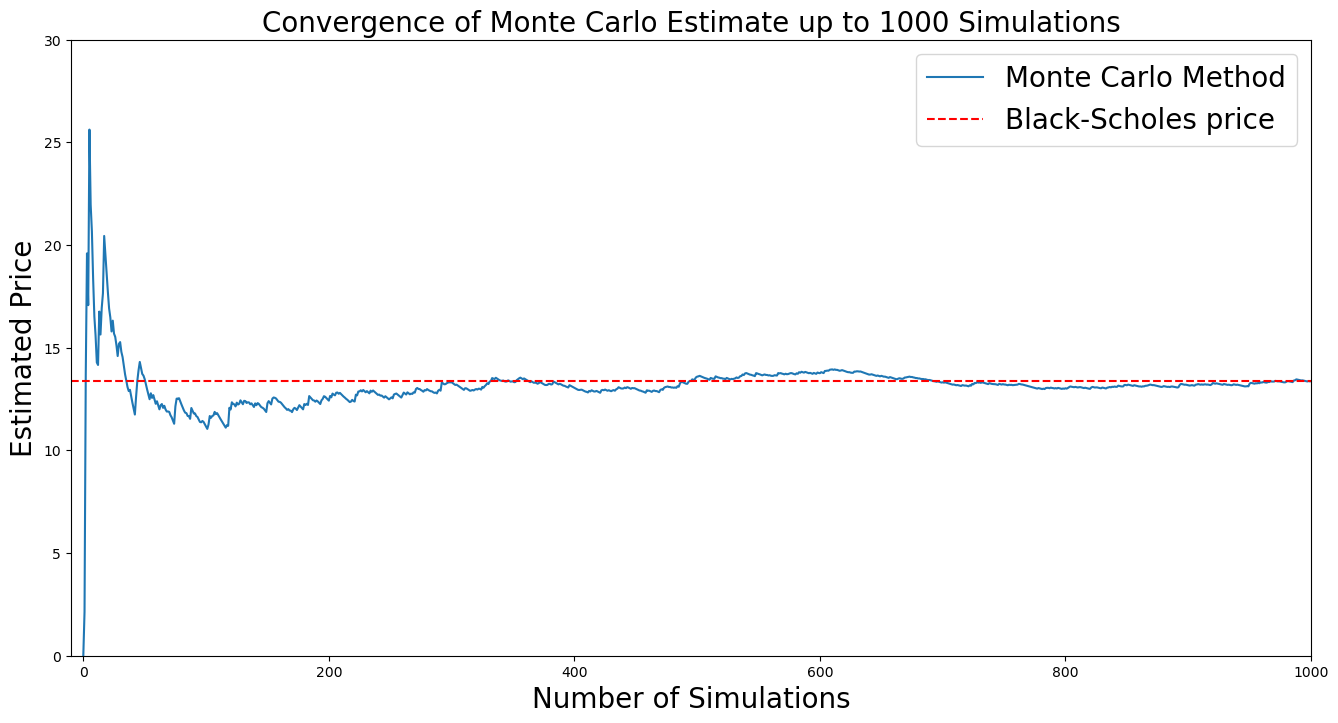

In [361]:
# basic method convergence diagram
S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1000
Z = np.random.normal(size=N) # random sampling from n(1, 0) n times

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
running_price = np.cumsum(payoffs) / np.arange(1, N + 1)

# used as 'true' pricing (just simulated with like 10000000 for n)
true_price = V(100, 100, 1, 0.07, 0.25, 100000000)

# plotting
fig, ax = subplots(figsize = (16, 8))
ax.plot(running_price, label="Monte Carlo Method")
ax.axhline(true_price, color='r', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of Monte Carlo Estimate up to 1000 Simulations", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
ax.legend(fontsize = '20')
fig.savefig('basicConvergence.png')

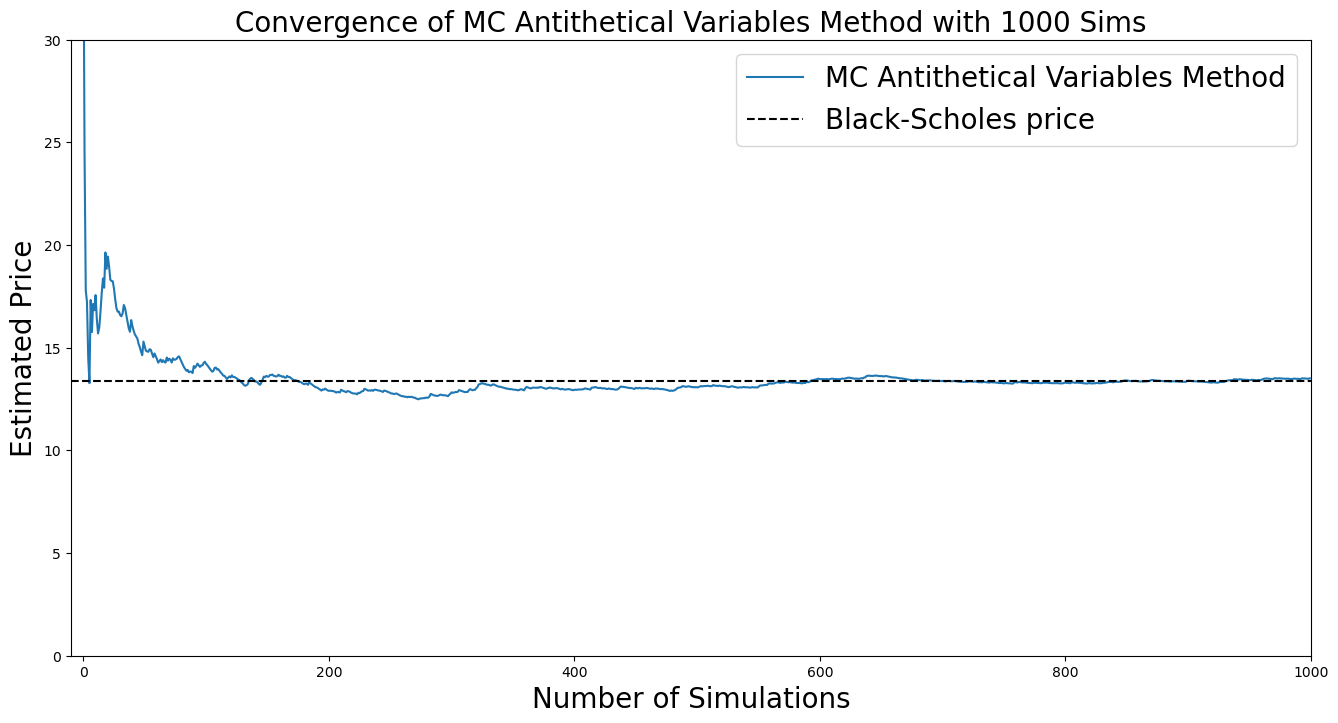

In [362]:
# antithetical variable plot
S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1000
Z = np.random.normal(size=N) # random sampling from n(1, 0) n times
antiZ = -Z

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
antiST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * antiZ)
payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
antipayoffs = np.exp(-r * T) * np.maximum(antiST - K, 0)
pairpayoffs = 0.5 * (payoffs + antipayoffs)
running_price = np.cumsum(pairpayoffs) / np.arange(1, N + 1)

# used as 'true' pricing (just simulated with like 100000 for n)
bs_price = V(100, 100, 1, 0.07, 0.25, 1000000)

# plotting
fig, ax = subplots(figsize = (16, 8))
ax.plot(running_price, label="MC Antithetical Variables Method")
ax.axhline(bs_price, color='k', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of MC Antithetical Variables Method with 1000 Sims", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.legend(fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
fig.savefig('antiConvergence.png')

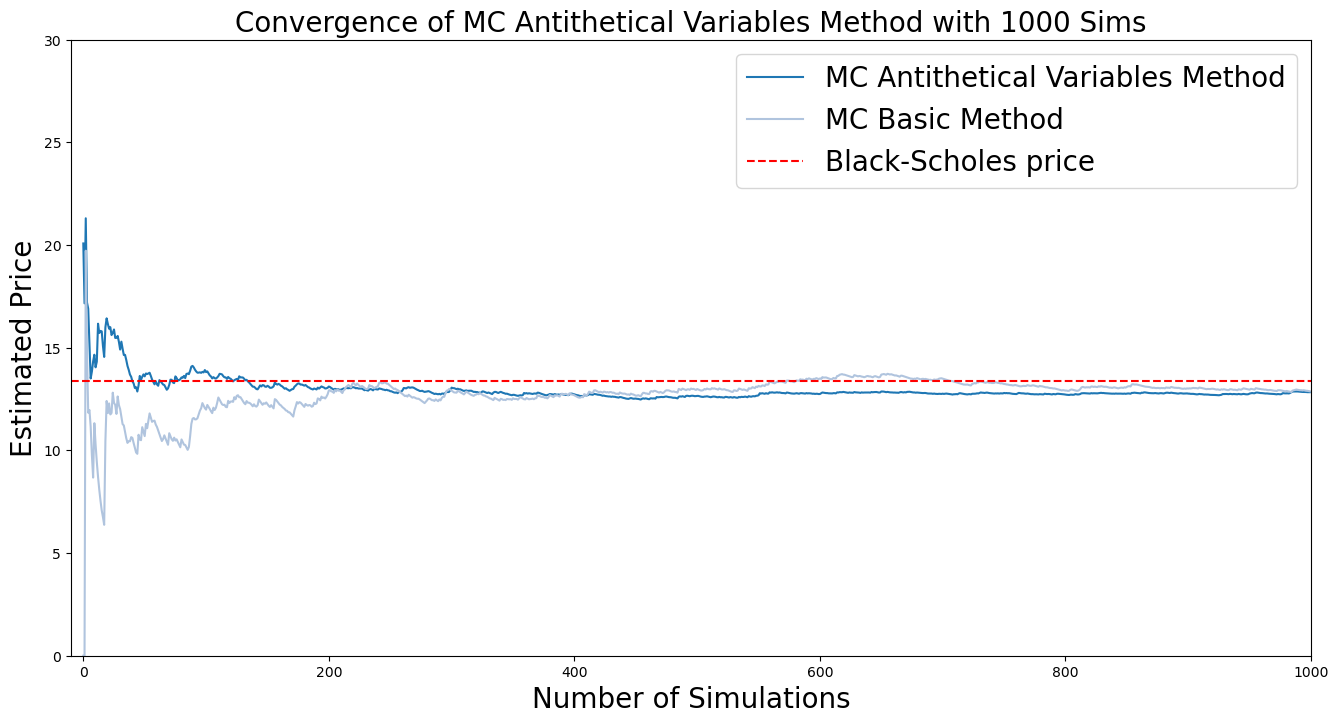

In [363]:
# comparison plot, not sure if will use
S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1000
Z = np.random.normal(size=N) # random sampling from n(1, 0) n times
antiZ = -Z

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
antiST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * antiZ)
payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
antipayoffs = np.exp(-r * T) * np.maximum(antiST - K, 0)
pairpayoffs = 0.5 * (payoffs + antipayoffs)
running_price = np.cumsum(pairpayoffs) / np.arange(1, N + 1)

STbasic = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffsbasic = np.exp(-r * T) * np.maximum(STbasic - K, 0)
running_pricebasic = np.cumsum(payoffsbasic) / np.arange(1, N + 1)

# used as 'true' pricing (just simulated with like 100000 for n)
bs_price = V(100, 100, 1, 0.07, 0.25, 1000000)

# plotting
fig, ax = subplots(figsize = (16, 8))
ax.plot(running_price, label="MC Antithetical Variables Method")
ax.plot(running_pricebasic, label = 'MC Basic Method', c = 'lightsteelblue')
ax.axhline(bs_price, color='r', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of MC Antithetical Variables Method with 1000 Sims", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.legend(fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
fig.savefig('antiConvergence.png')

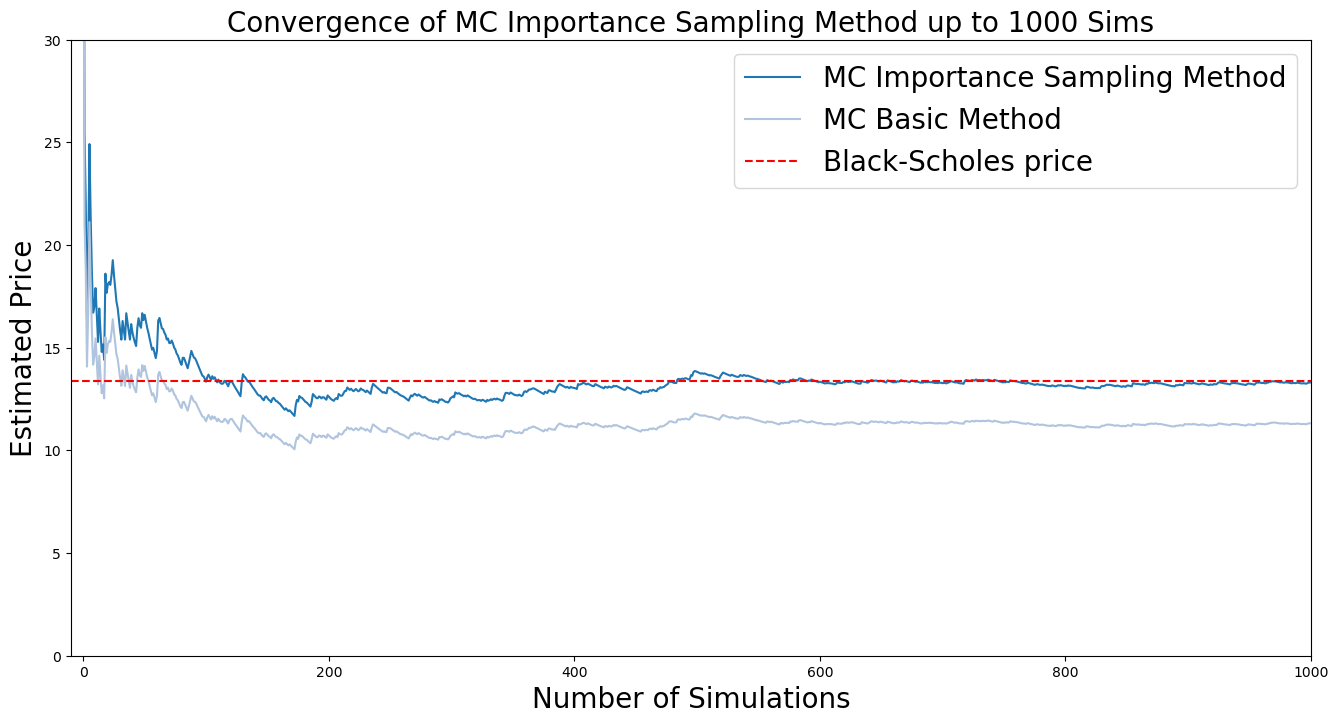

In [364]:
# importance sampling method convergence diagram
S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1000
X_star = (np.log(K/S0) - (r - 1/2*sigma**2)*T)/sigma*np.sqrt(T)
beta = X_star
Z = np.random.normal(loc = beta, size=N) # random sampling from n(1, 0) n times
weights = np.exp(-beta * Z - 0.5 * beta ** 2)

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)

weighted_pay = payoffs * weights
running_price_weighted = np.cumsum(weighted_pay) / np.arange(1, N + 1)
running_price = np.cumsum(payoffs) / np.arange(1, N + 1)

# used as 'true' pricing (just simulated with like 10000000 for n)
true_price = V(100, 100, 1, 0.07, 0.25, 100000000)

# plotting
fig, ax = subplots(figsize = (16, 8))
ax.plot(running_price_weighted, label="MC Importance Sampling Method")
ax.plot(running_price, label="MC Basic Method", c = 'lightsteelblue')
ax.axhline(true_price, color='r', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of MC Importance Sampling Method up to 1000 Sims", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
ax.legend(fontsize = '20')
fig.savefig('ImportanceConvergence.png')

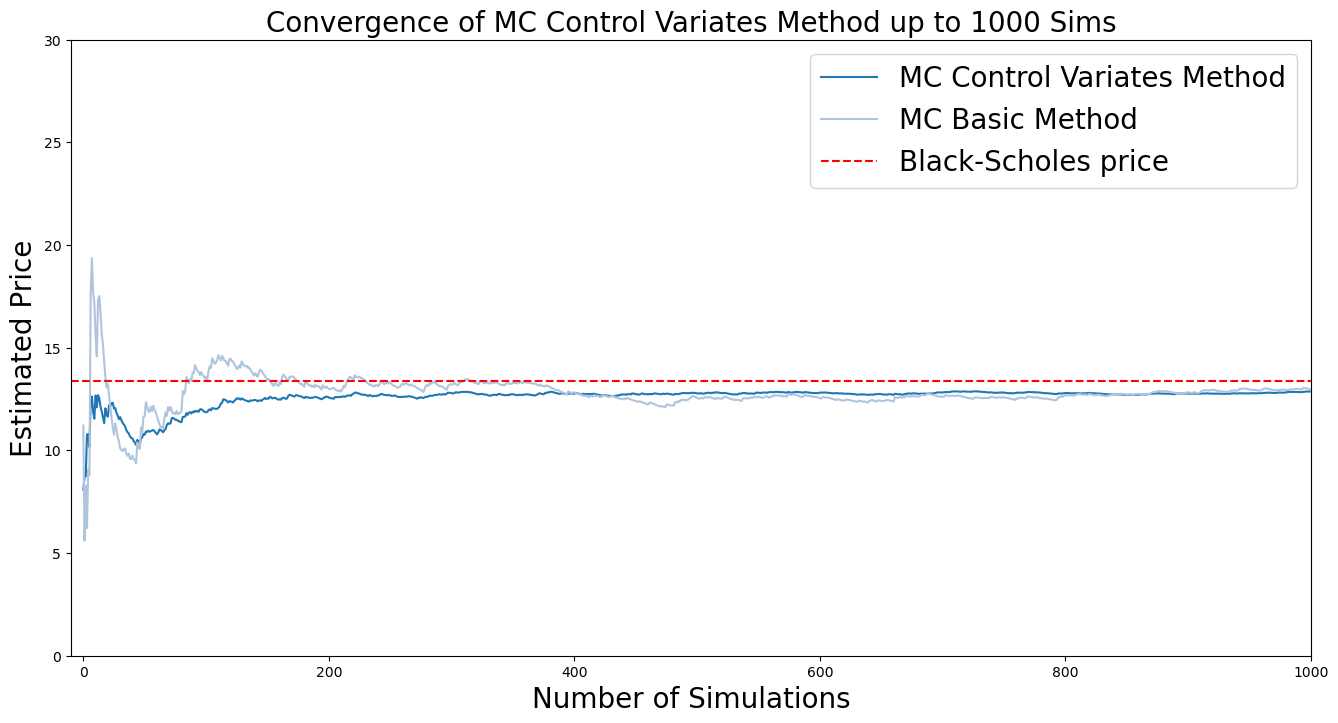

In [365]:
# control variates method convergence diagram
S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1000
Z = np.random.normal(size=N) # random sampling from n(1, 0) n times

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
f = np.exp(-r * T) * np.maximum(ST - K, 0)
h = np.exp(-r * T) * ST

# cv beta min
cov_fh = np.cov(f, h, ddof=1)[0, 1]
var_h  = np.var(h, ddof=1)
if var_h == 0:
    beta  = 0
else:
    beta = cov_fh / var_h

g = f + beta * (S0 - h)
running_priceCV = np.cumsum(g) / np.arange(1, N + 1)
running_price = np.cumsum(f)/np.arange(1, N + 1)


# used as 'true' pricing (just simulated with like 10000000 for n)
true_price = V(100, 100, 1, 0.07, 0.25, 100000000)

# plotting
fig, ax = subplots(figsize = (16, 8))
ax.plot(running_priceCV, label="MC Control Variates Method")
ax.plot(running_price, label="MC Basic Method", color = 'lightsteelblue')
ax.axhline(true_price, color='r', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of MC Control Variates Method up to 1000 Sims", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
ax.legend(fontsize = '20')
fig.savefig('CVConvergence.png')

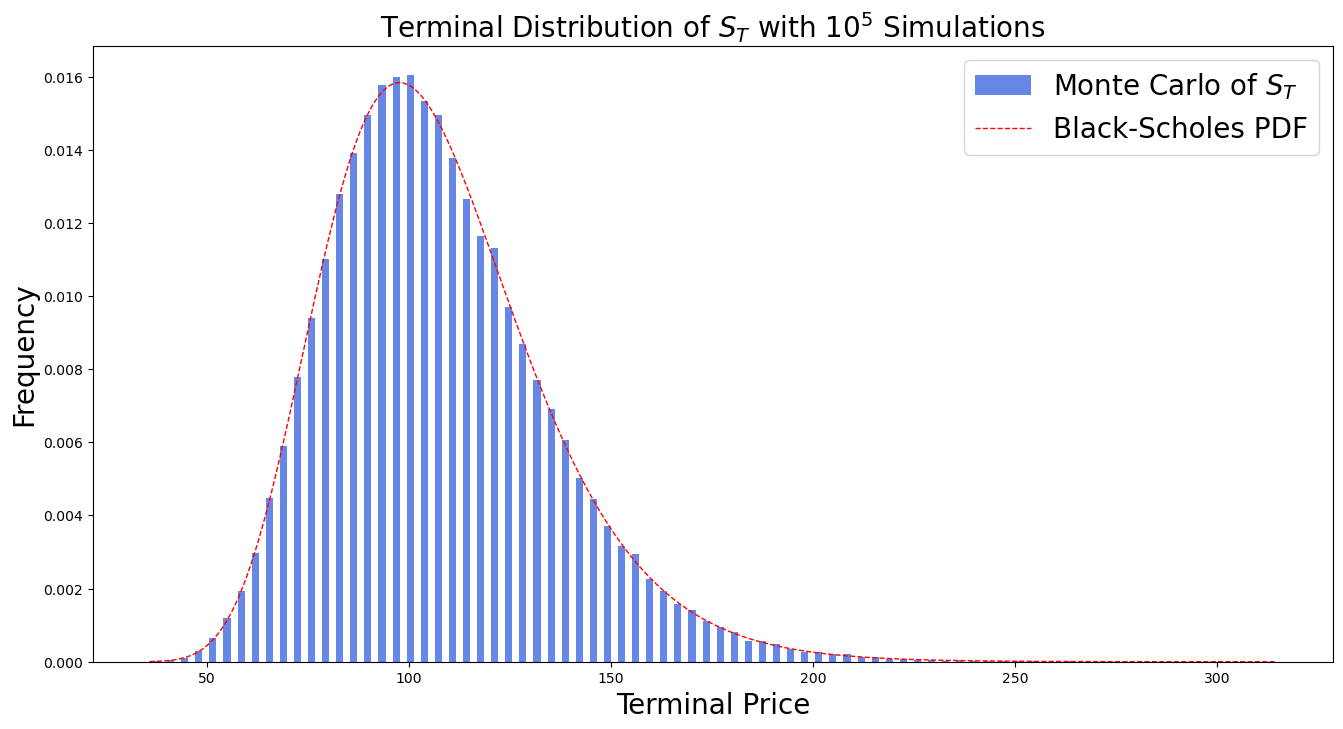

In [366]:
S0, K, r, sigma, T, N = 100, 100, 0.07, 0.25, 1.0, 100000
Z = np.random.normal(size=N)
ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)

# histogram
fig, ax = plt.subplots(figsize=(16,8))
ax.hist(ST, bins=80, density=True, alpha=0.8, label="Monte Carlo of $S_T$", color = 'royalblue', rwidth = 0.5)

# lognormal pdf overlay
s = np.linspace(ST.min(), ST.max(), 800)
mu_ln = np.log(S0) + (r - 0.5*sigma**2)*T
sd_ln = sigma*np.sqrt(T)
pdf = (1/(s*sd_ln*np.sqrt(2*np.pi))) * np.exp(-(np.log(s)-mu_ln)**2/(2*sd_ln**2))

ax.plot(s, pdf, linestyle="--", label="Black-Scholes PDF", c = 'r', linewidth = 1)
ax.set_title("Terminal Distribution of $S_T$ with $10^5$ Simulations", fontsize = 20)
ax.set_xlabel("Terminal Price", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)
ax.legend(fontsize = 20)
fig.savefig('terminalDist.png')

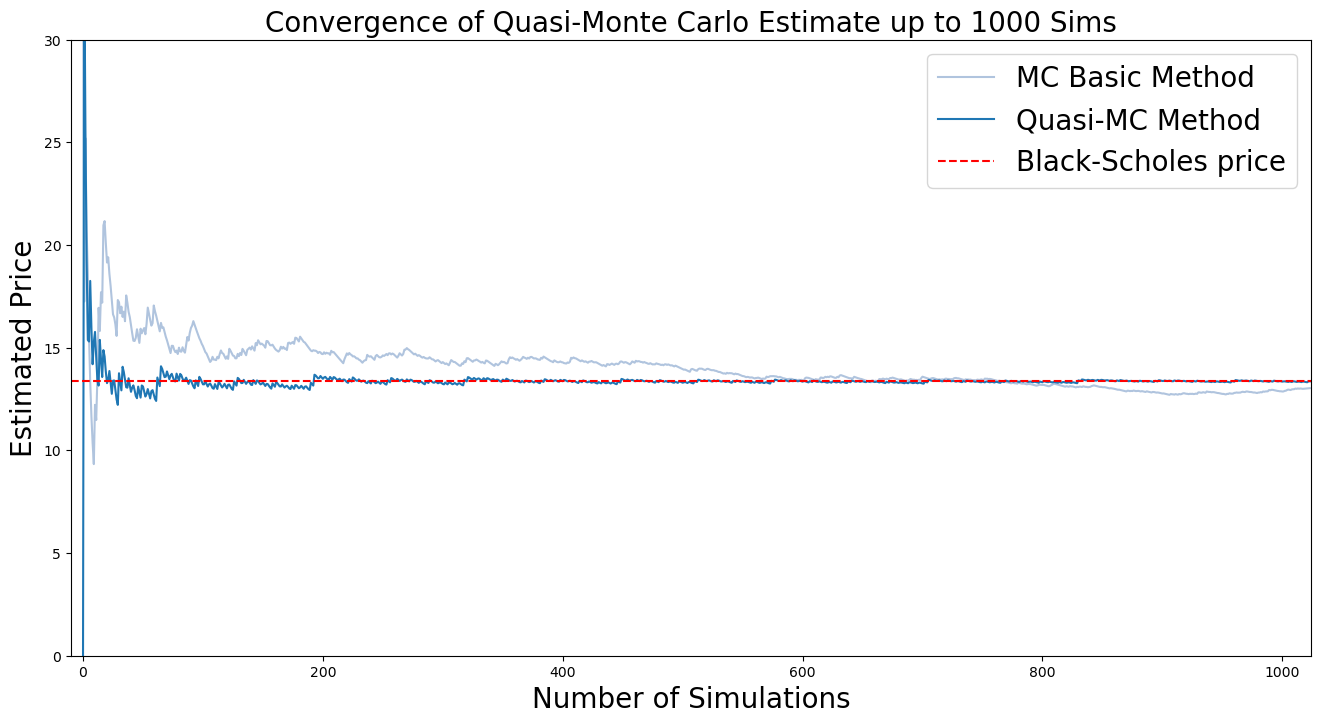

In [391]:
# basic method convergence diagram
S0, K, r, sigma, T = 100, 100, 0.07, 0.25, 1
N = 1024
Z = np.random.normal(size=N) # random sampling from n(1, 0) n times

#sobol
sobol_engine = qmc.Sobol(d=1, scramble=True)
U_qmc = sobol_engine.random(N).flatten()
Z_qmc = norm.ppf(U_qmc)  # transform to standard normal
ST_qmc = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z_qmc)
payoffs_qmc = np.exp(-r * T) * np.maximum(ST_qmc - K, 0)
running_price_qmc = np.cumsum(payoffs_qmc) / np.arange(1, N + 1)

ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
running_price = np.cumsum(payoffs) / np.arange(1, N + 1)

# used as 'true' pricing (just simulated with like 10000000 for n)
true_price = V(100, 100, 1, 0.07, 0.25, 100000000)

# plotting
fig, ax = subplots(figsize = (16, 8))
ax.plot(running_price, label="MC Basic Method", c = 'lightsteelblue')
ax.plot(running_price_qmc, label="Quasi-MC Method")
ax.axhline(true_price, color='r', linestyle='--', label="Black-Scholes price")
ax.set_title("Convergence of Quasi-Monte Carlo Estimate up to 1000 Sims", fontsize = '20')
ax.set_xlabel("Number of Simulations", fontsize = '20')
ax.set_ylabel("Estimated Price", fontsize = '20')
ax.set_ylim(0, 30)
ax.set_xlim(-10, N)
ax.legend(fontsize = '20')
fig.savefig('qmcConvergence.png')